# Part 1: Probability Distributions

## What is Binomial distribution?

Binomial distribution is is a discrete distribution that models the number the probability of getting a specific number of successes in a fixed number of independent trials, where each trial has two possible outcomes which are success or failure

#### Real-World Scenario: Defective Laptops (Binomial Distribution)

A laptop manufacturing company reports a 5% defect rate in its production process. To assess quality control, a random sample of 10 laptops is selected for inspection. What is the probability that exactly 2 of the 10 laptops in the sample are defective?

####Why This Fits the Binomial Model

1.   Fixed number of trials: 10 laptops
2.   Two outcomes: Defective or Not defective
3.   Constant probability of defect: 5% (p = 0.05)
4.   Looking for: Exactly 2 defects

Binomial formula


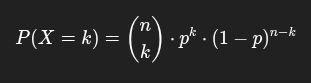

Where:
n=10
k=2
p=0.05

In [ ]:
#factorial culculation
def factorial(n):
  result=1
  for i in range(1,n+1):
    result*=i
  return result

def combination(n,k): # culculation of combination( possible ways for choosing k items from n trials)
  return factorial(n) // (factorial(k) * factorial(n-k))


def binomial_probability(n,k,p): # function to culculate binomial probability og getting exactly k(2) success out of n trials(10)
  return combination(n,k) * (p**k) * ((1-p)**(n-k))

# Our parameters
n=10 #number of trials
k=2  #number of success (defective computers)
p=0.05 #the probability of success ( getting  a defective laptop)

probability=binomial_probability(n,k,p)
print(f"Probability of exactly {k} defective computers is :{probability:.10f}")


Probability of exactly 2 defective computers is :0.0746347985


**Probability Distribution Graph**

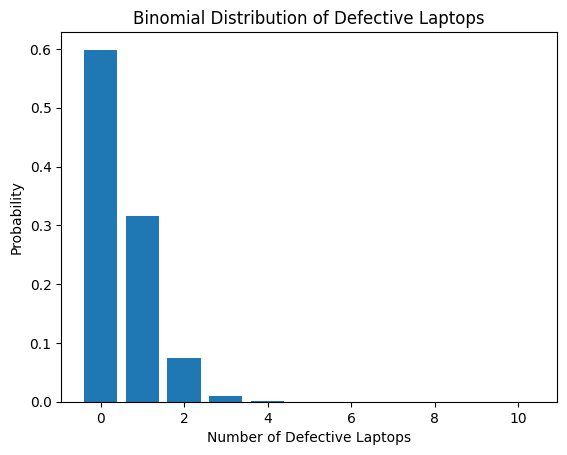

Y values: [0.5987369392383787, 0.31512470486230454, 0.07463479852001952, 0.010475059441406248, 0.0009648081064453125, 6.0935248828124994e-05, 2.672598632812501e-06, 8.037890625000001e-08, 1.586425781250001e-09, 1.8554687500000008e-11, 9.765625000000005e-14]


In [ ]:
import matplotlib.pyplot as plt

x_values=range(11) # this is from 0 to 10 defects
y_values=[binomial_probability(n,k,p) for k in x_values]

plt.bar(x_values,y_values)
plt.title("Binomial Distribution of Defective Laptops n=10, p=0.05)")
plt.xlabel("Number of Defective Laptops")
plt.ylabel("Probability")
plt.title("Binomial Distribution of Defective Laptops")
plt.show()
print(f"Y values: {y_values}")


This graph shows the probabilities for 0 to 10 defective laptops out of 10.This is a right-skewed distribution (long tail to the right), which is typical for low-probability events in binomial distribution


##Insights & Comparison

1. The Binomial distribution is discrete and focuses on fixed trials with two outcomes

2. This differs from the Normal distribution, which is continuous and symmetric, modeling things like heights or test scores

3. If we increased sample size to a very large number, the Binomial distribution starts to resemble a Normal distribution

4. The Poisson distribution models events occurring randomly over time, unlike the fixed trials in Binomial

5. The Exponential distribution models waiting time between events, which is different from counting successes



## GRADIENT DESCENT IN CODE

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [ ]:
data = [(1, 3), (3, 6)]
n = len(data)
n

2

In [ ]:
# Initial values
m = -1.0
b = 1.0
alpha = 0.1
iterations = 4

In [ ]:
def predict(x, m, b):
    """Compute predicted value."""
    return m * x + b

In [ ]:
def compute_gradients(data, m, b):
    """Compute gradients using assignment formula."""
    grad_m = 0
    grad_b = 0
    for x, y in data:
        error = y - predict(x, m, b)
        grad_m += error * x
        grad_b += error
    grad_m = - (2 / n) * grad_m
    grad_b = - (2 / n) * grad_b
    return grad_m, grad_b

In [ ]:
def compute_mse(data, m, b):
    """Compute mean squared error."""
    total_error = 0
    for x, y in data:
        total_error += (y - predict(x, m, b)) ** 2
    return total_error / n


In [ ]:
def gradient_descent(data, m, b, alpha, iterations):
    """Perform gradient descent for specified iterations."""
    m_history = [m]
    b_history = [b]
    error_history = []

    for i in range(iterations):
        grad_m, grad_b = compute_gradients(data, m, b)
        m -= alpha * grad_m
        b -= alpha * grad_b
        mse = compute_mse(data, m, b)

        m_history.append(m)
        b_history.append(b)
        error_history.append(mse)

        print(f"Iteration {i+1}: m = {m:.4f}, b = {b:.4f}, MSE = {mse:.4f}")

    return m, b, m_history, b_history, error_history

m, b, m_vals, b_vals, error_vals = gradient_descent(data, m, b, alpha, iterations)



Iteration 1: m = 1.7000, b = 2.1000, MSE = 1.0400
Iteration 2: m = 1.2600, b = 1.9000, MSE = 0.0640
Iteration 3: m = 1.3400, b = 1.9160, MSE = 0.0348
Iteration 4: m = 1.3336, b = 1.8968, MSE = 0.0318


In [ ]:
# Final Predictions
print("\nFinal Predictions:")
for x, _ in data:
    print(f"x = {x}, predicted y = {predict(x, m, b):.4f}")


Final Predictions:
x = 1, predicted y = 3.2304
x = 3, predicted y = 5.8976


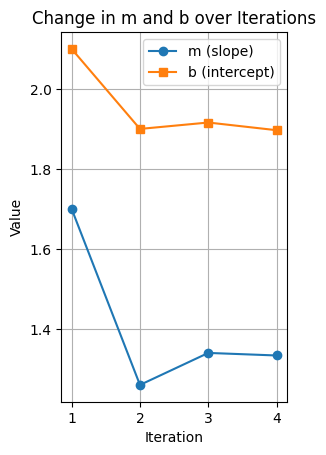

In [ ]:
# m and b plot
plt.subplot(1, 2, 1)
plt.plot(range(1, iterations + 1), m_vals[1:], label='m (slope)', marker='o')
plt.plot(range(1, iterations + 1), b_vals[1:], label='b (intercept)', marker='s')
plt.title("Change in m and b over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.grid(True)
plt.legend()

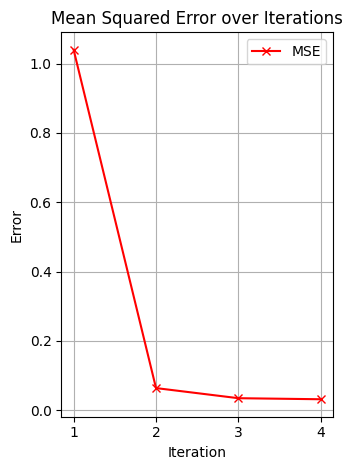

In [ ]:
# Error plot
plt.subplot(1, 2, 2)
plt.plot(range(1, iterations + 1), error_vals, label='MSE', marker='x', color='red')
plt.title("Mean Squared Error over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

**2. Bayesian Probability**


The real world problem: We will take a scenario of a medical Diagnosis like COVID-19 in 2025.

Suppose  Covid-19 affects 1% of a population. A test is developed for it, with the following properties: Let us suppose that 100 people are tested.

False positive: You don’t have COVID-19, while you do have it. (5% are false positives)

False Negative: You have COVID-19, while unfortunately, you don’t have any disease. (10% are false negatives)

People take the test, and it comes back positive. What is the probability that the people have COVID-19?

Let’s assume that 

A = Person has Covid-19

~A = Person doesn't have Covid-19

B = Test result is Positive

~B = Test result is Negative


Where:

P(A)=0.01P(A) = 0.01P(A)=0.01 → prior probability of having Covid-19

P(¬A)=0.99P(¬A) = 0.99P(¬A)=0.99 → prior probability of not having Covid-19

P(B∣A)=0.90P(B|A) = 0.90P(B∣A)=0.90 → probability of a positive test if you have Covid (true positive)

P(B∣¬A)=0.05P(B|¬A) = 0.05P(B∣¬A)=0.05 → probability of a positive test if you don’t have Covid (false positive)

In [11]:
# Define the terms with labeled variables
P_A = 0.01                 # P(A): prior probability of having Covid
P_not_A = 1 - P_A          # P(¬A)

P_B_given_A = 0.90         # P(B|A): test is positive given Covid
P_B_given_not_A = 0.05     # P(B|¬A): test is positive without Covid

# Total probability of positive test P(B)
P_B = P_B_given_A * P_A + P_B_given_not_A * P_not_A

# Bayes' theorem: P(A|B)
P_A_given_B = (P_B_given_A * P_A) / P_B

# Output the results
print(f"P(A) = {P_A:.2%}")
print(f"P(¬A) = {P_not_A:.2%}")
print(f"P(B|A) = {P_B_given_A:.2%}")
print(f"P(B|¬A) = {P_B_given_not_A:.2%}")
print(f"P(B) = {P_B:.2%}")
print(f"P(A|B) = {P_A_given_B:.2%}")

P(A) = 1.00%
P(¬A) = 99.00%
P(B|A) = 90.00%
P(B|¬A) = 5.00%
P(B) = 5.85%
P(A|B) = 15.38%


Explain the practical significance of Bayesian inference.

Bayesian inference helps:

1. Doctors interpret test results accurately.
2. Engineers tune AI models.
3. Scientists update hypotheses with new data.
4. Everyone makes rational decisions under uncertainty.
